## CIS 9
## Matplotlib, Data Visualization

A picture (or a plot) is worth a thousand words.

Reading
<br>The Data Science Handbook, Chapter 4:
- Simple Line Plots
- Simple Scatter Plots
- Histograms, Binnings, Density: up to Two-Dimensional Histogram
- Customizing Legends
- Multiple subplots
- Customizing ticks
<br>
<br>Think Stats, at the following links:
- Distribution: Histogram, Summarizing distribution
- Relationship between variables: Scatter plots, Characterizing relationships, Correlation, Correlation and causation

Just like how Pandas relies on Numpy for math computation, Pandas relies on Matplotlib for plotting data.
<br>Pandas DataFrame plotting is for basic plots, and to customize the plots we need to go directly to Matplotlib.

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

### Line plot 
A line plot shows the data trend: how data change over time, or over different locations, or over a range of input, or as a condition changes.
<br>A line plot is for __univariate__ and __quantitative__ data

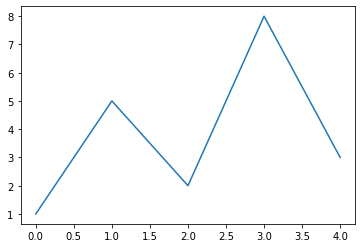

In [2]:
# 1. A basic line plot, with no customization
nums = pd.Series([1,5,2,8,3])
plt.plot(nums)
#plt.show()

Default values are:
- A line connects the data points 1,5,2,8,3 of nums
- The line color is blue
- The y-axis ticks (values 1-8) is determined by matplotlib based on the data range of nums
- The x-axis ticks (values 0.0-4.0) is determined by matplotlib based on the index of nums

For a line plot we typically plot 2 corresponding data sequences, such as costs over time.
- The independent data sequence (time) are along the x-axis or horizontal axis
- The dependent data sequence (cost depends on time) are along the y-axis or vertical axis

In [4]:
# 2. Data for a more realistic line plot
gb = pd.read_excel("scores.xlsx", index_col='Student')
gb

,quiz1,midterm,quiz2,final
Student,,,,
Sleepy,43,34.0,34,35
Happy,33,20.0,23,49
Doc,48,32.0,36,37
Grumpy,40,23.5,40,45
Bashful,46,42.5,46,31
Sneezy,48,38.5,48,43
Dopey,38,45.0,39,32
Snow White,41,48.0,39,41


quiz1      33.0
midterm    20.0
quiz2      23.0
final      49.0
Name: Happy, dtype: float64


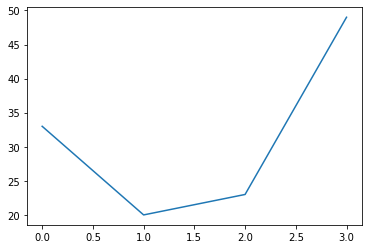

In [5]:
# 3. plotting how 'Happy' did in the exams
print(gb.loc['Happy'])
plt.plot(np.arange(4),gb.loc['Happy'])

# Why 4 in np.arange(4)?
## np.arange() returns an array with evenly spaced elements based on the parameters. Essentially, np.arange()
## acts similar to Python's range(). Therefore, np.arange(4) returns [0, 1, 2, 3], which act as the x-coordinates
## for the plot.

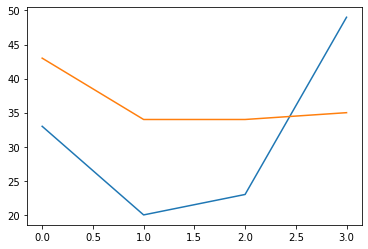

In [6]:
# 4. plotting both 'Happy' and 'Sleepy' exams
plt.plot(np.arange(4),gb.loc['Happy'])
plt.plot(np.arange(4),gb.loc['Sleepy'])

# Observing the plot, what can we say about Happy's and Sleepy's performance in class?   ** EC **
## Happy had a general decline in his performance in class after quiz1.
## However, it seems he worked hard and did much better on the final compared to his quiz1 and Sleepy's final.
## Sleepy also had a similar initial performance, as his midterm and quiz2 scores were worse than his quiz1 score.
## In this case, he didn't vastly improve in the final and instead had a stagnant performance in his midterm,
## quiz2, and final.

__Customize plots__ to make them easier to understand
<br>These features work for all types of plot, not just line plots

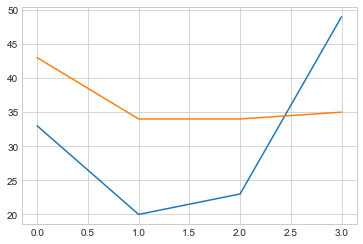

In [7]:
# 5. add grid to the plot
plt.style.use('seaborn-whitegrid')   # only need to do this one time
                                     # it's typically put at the 'import' cell
plt.plot(np.arange(4),gb.loc['Happy'])
plt.plot(np.arange(4),gb.loc['Sleepy'])

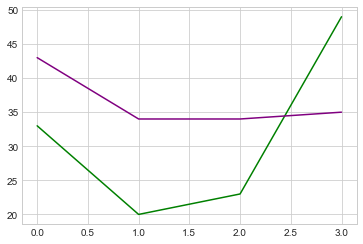

In [8]:
# 6. customize line color
plt.plot(np.arange(4),gb.loc['Happy'], color='green')
plt.plot(np.arange(4),gb.loc['Sleepy'], color='purple')

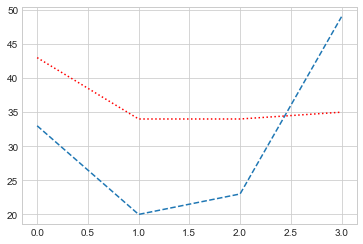

In [9]:
# 7. customize line style (works for line plots only)
plt.plot(np.arange(4),gb.loc['Happy'], linestyle='dashed')
plt.plot(np.arange(4),gb.loc['Sleepy'], color='red', linestyle='dotted')

[Shorthand notation for line style and color](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html)
<br>Scroll down to see the list of characters for line style and color

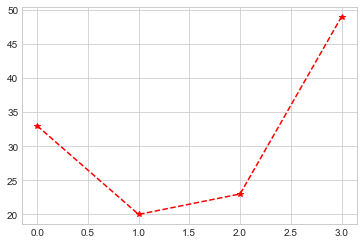

In [10]:
# 8. combine both color and style with shorthand notation
plt.plot(np.arange(4),gb.loc['Happy'], '*--r')
# using shorthand notation, plot Sleepy's exams as a line with a circle marker 
# at each data point?


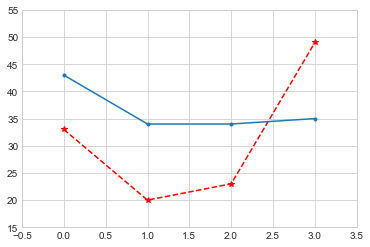

In [11]:
# 9. adjusting limits on axes
plt.axis([-0.5,3.5,15,55])
plt.plot(np.arange(4),gb.loc['Happy'], '*--r')
plt.plot(np.arange(4),gb.loc['Sleepy'], '.-')

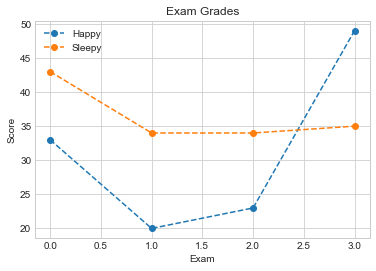

In [12]:
# 10. label plot
plt.title("Exam Grades")
plt.xlabel("Exam")
plt.ylabel("Score")
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend()

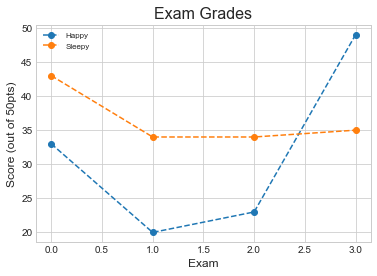

In [13]:
# 11. change font size
plt.title("Exam Grades",fontsize=16)
plt.xlabel("Exam",fontsize=12)
plt.ylabel("Score (out of 50pts)",fontsize=12)
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)

[]

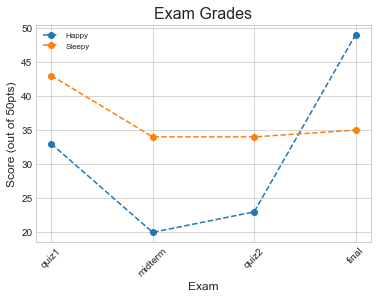

In [14]:
# 12. change xticks and yticks
plt.title("Exam Grades",fontsize=16)
plt.xlabel("Exam",fontsize=12)
plt.ylabel("Score (out of 50pts)",fontsize=12)
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)
# the x-values are 0-4, which is not user friendly
# we can change x-ticks to more descriptive strings:
plt.xticks(np.arange(4),('quiz1','midterm', 'quiz2', 'final'))
plt.xticks(np.arange(4),('quiz1','midterm', 'quiz2', 'final'),rotation=45)
plt.plot()

([<matplotlib.axis.XTick at 0x7fe2592c4b80>,
 [Text(0, 0, 'quiz1'),
  Text(1, 0, 'midterm'),
  Text(2, 0, 'quiz2'),
  Text(3, 0, 'final')])

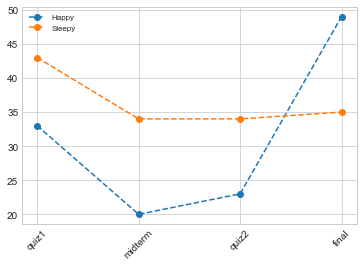

In [16]:
# alternatively, if we have the strings from the dataset, then we can use 
# the 4 text strings for the x-values in the plot function

plt.plot(gb.columns,gb.loc['Happy'], 'o--', label='Happy')
plt.plot(gb.columns,gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)
plt.xticks(rotation=45)

# How to get the strings from the dataset directly, instead of having to        ** EC **
# type in the 4 strings?             
plt.xticks(np.arange(4), gb.columns)

In [ ]:
# 13. subplot
plt.subplot(1,2,1)   # 1 row, 2 cols, subplot 1
plt.subplots_adjust(hspace=0.4,wspace=0.4)

plt.title("Exam Grades",fontsize=16)
plt.xlabel("Exam",fontsize=12)
plt.ylabel("Score (out of 50pts)",fontsize=12)
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)
plt.xticks(np.arange(4), ('quiz1','midterm', 'quiz2', 'final') ) 

plt.subplot(1,2,2)   # 1 row, 2 cols, subplot 2
x = np.linspace(0, 4*np.pi, 400)
plt.plot(x, np.sin(x))
plt.title("Sine wave")

In [ ]:
# Change the size of the plot above so that the 2 subplots have more room
fig = plt.figure(figsize=(10,4))

# the rest of the code is the same
plt.subplot(1,2,1)   # 1 row, 2 cols, subplot 1
plt.subplots_adjust(hspace=0.4,wspace=0.3)

plt.title("Exam Grades",fontsize=16)
plt.xlabel("Exam",fontsize=12)
plt.ylabel("Score (out of 50pts)",fontsize=12)
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)
plt.xticks(np.arange(4), ('quiz1','midterm', 'quiz2', 'final') ) 

plt.subplot(1,2,2)   # 1 row, 2 cols, subplot 2
x = np.linspace(0, 4*np.pi, 400)
plt.plot(x, np.sin(x))
plt.title("Sine wave")

In [ ]:
# 14. given the 2 plots below (same as the 2 plots above)
# add to the code so that the plot has 2 subplots, 
# where the exam grade plot is put above the sine wave plot?

plt.title("Exam Grades",fontsize=16)
plt.xlabel("Exam",fontsize=12)
plt.ylabel("Score (out of 50pts)",fontsize=12)
plt.plot(np.arange(4),gb.loc['Happy'], 'o--', label='Happy')
plt.plot(np.arange(4),gb.loc['Sleepy'], 'o--', label='Sleepy')
plt.legend(fontsize=8)
plt.xticks(np.arange(4), ('quiz1','midterm', 'quiz2', 'final') ) 

x = np.linspace(0, 4*np.pi, 400)
plt.plot(x, np.sin(x))
plt.title("Sine wave")


---

### Histogram
A histogram shows the frequency distribution of the dataset, or how data are distributed over the range data. It gives an overview of the dataset.
<br>A histogram divides the data range into bins and displays a count of the data points whose values are in a particular bin.
<br>A histogram is used with __univariate__ and __quantitative__ data

In [ ]:
# 15. A 'classic' distribution is the normal or Gaussian distribution, also known as the bell curve
nums = np.random.normal(size=8000)
plt.hist(nums, bins=50)
plt.plot()


In [ ]:
# 16. reading in data
gb = pd.read_excel("scores.xlsx", index_col='Student')
gb

In [ ]:
# 17. show the score distribution of all exams
total = (gb['quiz1'])
total = total.append(gb['midterm'])
total = total.append(gb['quiz2'])
total = total.append(gb['final'])
plt.hist(total)

Default values are:
- the color is blue
- the range of data is along the x-axis
- the count of data values in each bin is along the y-axis
- the number of bins is 10. In this example: (50-20)/10 = 3, so the bins are: 20-23pts, 23-26pts, 26-29pts, 29-32pts...

In [ ]:
# 18. display 2 distributions for comparison
quiz = gb['quiz1']
quiz = quiz.append(gb['quiz2'])
exam = gb['midterm']
exam = exam.append(gb['final'])
plt.hist(quiz, color='green', label='quiz', alpha=0.2)
plt.hist(exam, color='purple', label='exam', alpha=0.2)
plt.legend()

In [ ]:
# What conclusion can we draw about how students did in the quiz and exam?

__Bar chart__: gives a comparison of the categories within a dataset.
<br>Categories, or categorical data, show the groupings of data.
<br>Example: data are drinks people have at a meal, categories are sodas, water, tea, coffee
<br>Or: data are employees at a company, categories are full time, part time, seasonal employees
<br>A bar chart is used with __univariate__ and __categorical__ data

In [ ]:
19. gradebook = pd.read_excel("scores.xlsx", index_col='Student')
stInfo = pd.read_excel("ids.xlsx", index_col='Student')
data = pd.concat([stInfo, gradebook], axis=1)
print(data)
finals = data.groupby("year").mean().final
print(data.groupby("year").mean())
print(finals.values)
print(finals.index.values)

In [ ]:
# 20. In a bar chart, the categories are along the x-axis, 
# and the count of data belong in each category is along the y-axis
plt.bar(np.arange(len(finals)), finals, align="center")
plt.xticks(np.arange(len(finals)),finals.index.values) 
plt.xlabel("Year in School")
plt.ylabel("Mean Final Exam Score")

In [ ]:
# What conclusion can we draw from the bar chart?          ** EC **

__Scatter Plot__: shows the relationship between 2 datasets.
<br>Data values of each set are plotted and their locations on the plot can show any correlation between the two sets.
<br>A scatter plot is used with __bivariate__ and __quantitative__ data

In [ ]:
# 21. scatter plot of unrelated data
x = np.random.normal(5.0, 1.0, 200)   # center around 5, spread of 1
y = np.random.normal(10.0, 2.0, 200)  # center around 10, spread of 2
plt.scatter(x, y)
plt.title("Normal distribution data")

In [ ]:
# 22. scatter plot of correlated data: temperature vs. ice cream sales
temp = (14.2,16.4,11.9,15.2,18.5,22.1,19.4,25.1,23.4,18.1,22.6,17.2)
sale = (215,325,185,332,406,522,412,614,544,421,445,408)
plt.scatter(temp,sale)    
plt.title("Ice Cream Sale")
plt.xlabel("Temp in Celsius")
plt.ylabel("Sale in Dollars")

In [ ]:
# Looking ahead:
from scipy import stats

(slope, intercept, r, *rest) = stats.linregress(temp, sale)
print(r)

def f(val):
    return slope * val + intercept

print(f(29))   # 29C = 85F

line = [f(val) for val in temp]
plt.scatter(temp,sale)
plt.plot(temp, line, '-g')